In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Turag/Python/DL Lab/Univariate/TNA/')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error as mse
from functions_learning import *
from feed_data import data_extract
from tensorflow import keras
from keras import layers

In [ ]:
epochs = 50

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Turag/Python/DL Lab/Univariate/pHA/data/LocationA.csv")

df.drop(columns=["Unnamed: 0", "Date"], inplace=True)
df.head()

,TempA,pHA,ECA,DOA,BODA,TNA
0,21.50,7.73,1748,2.55,27.96,1.28
1,21.21,7.82,1765,2.60,27.90,1.08
2,21.21,7.73,1769,2.59,27.88,1.17
3,21.26,7.82,1776,2.63,27.66,1.15
4,21.09,7.76,1822,2.60,27.71,1.22


In [ ]:
WINDOW_SIZE = 3
TNA = df["TNA"]
TNA

0      1.28
1      1.08
2      1.17
3      1.15
4      1.22
       ... 
360    1.28
361    1.29
362    1.31
363    1.27
364    1.29
Name: TNA, Length: 365, dtype: float64

In [ ]:
X1, y1 = df_to_X_y(TNA, WINDOW_SIZE)
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

# General Model

### CNN

Epoch 1/50
8/8 [==============================] - 3s 250ms/step - loss: 4.1002 - root_mean_squared_error: 2.0249 - val_loss: 3.4173 - val_root_mean_squared_error: 1.8486
Epoch 2/50
8/8 [==============================] - 1s 119ms/step - loss: 3.7352 - root_mean_squared_error: 1.9327 - val_loss: 3.1020 - val_root_mean_squared_error: 1.7613
Epoch 3/50
8/8 [==============================] - 1s 91ms/step - loss: 3.3840 - root_mean_squared_error: 1.8396 - val_loss: 2.8053 - val_root_mean_squared_error: 1.6749
Epoch 4/50
8/8 [==============================] - 1s 84ms/step - loss: 3.0558 - root_mean_squared_error: 1.7481 - val_loss: 2.5330 - val_root_mean_squared_error: 1.5915
Epoch 5/50
8/8 [==============================] - 1s 88ms/step - loss: 2.7477 - root_mean_squared_error: 1.6576 - val_loss: 2.2811 - val_root_mean_squared_error: 1.5103
Epoch 6/50
8/8 [==============================] - 1s 82ms/step - loss: 2.4770 - root_mean_squared_error: 1.5738 - val_loss: 2.0399 - val_root_mean_square

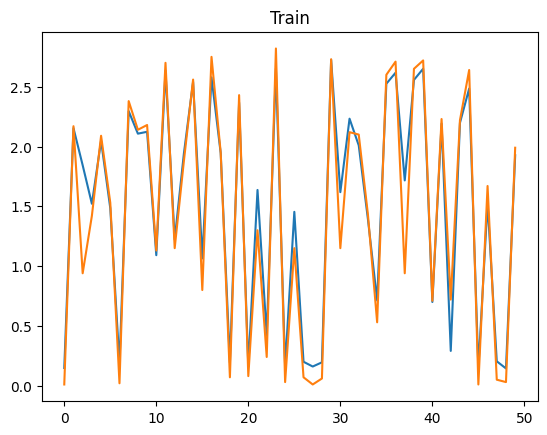

2/2 [==============================] - 0s 7ms/step


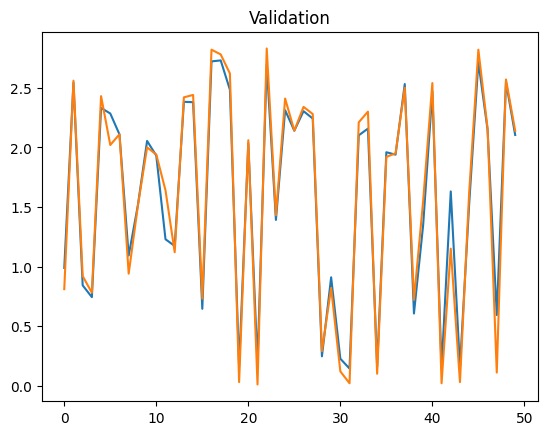

3/3 [==============================] - 0s 5ms/step


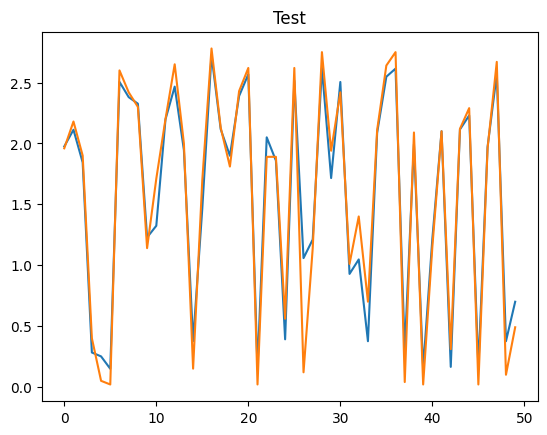

3/3 [==============================] - 0s 3ms/step


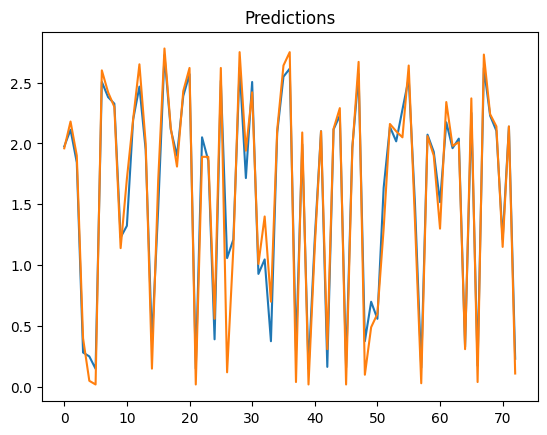

In [ ]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))



cp = ModelCheckpoint('cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
cnn_mse = plot_predictions1(model,x_test, y_test)

### GRU

Epoch 1/50
8/8 [==============================] - 6s 480ms/step - loss: 2.8940 - root_mean_squared_error: 1.7012 - val_loss: 2.4750 - val_root_mean_squared_error: 1.5732
Epoch 2/50
8/8 [==============================] - 3s 412ms/step - loss: 2.7413 - root_mean_squared_error: 1.6557 - val_loss: 2.3411 - val_root_mean_squared_error: 1.5301
Epoch 3/50
8/8 [==============================] - 4s 625ms/step - loss: 2.5902 - root_mean_squared_error: 1.6094 - val_loss: 2.2108 - val_root_mean_squared_error: 1.4869
Epoch 4/50
8/8 [==============================] - 3s 415ms/step - loss: 2.4456 - root_mean_squared_error: 1.5638 - val_loss: 2.0826 - val_root_mean_squared_error: 1.4431
Epoch 5/50
8/8 [==============================] - 3s 413ms/step - loss: 2.3030 - root_mean_squared_error: 1.5176 - val_loss: 1.9607 - val_root_mean_squared_error: 1.4002
Epoch 6/50
8/8 [==============================] - 3s 420ms/step - loss: 2.1678 - root_mean_squared_error: 1.4723 - val_loss: 1.8407 - val_root_mean_sq

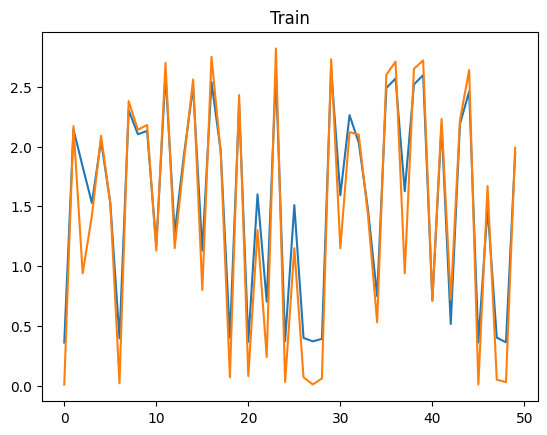

2/2 [==============================] - 0s 7ms/step


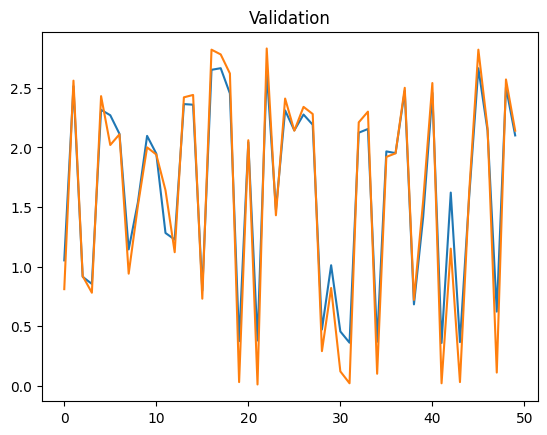

3/3 [==============================] - 0s 4ms/step


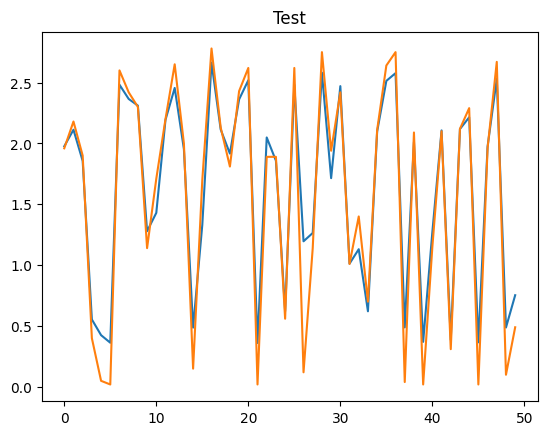

3/3 [==============================] - 0s 4ms/step


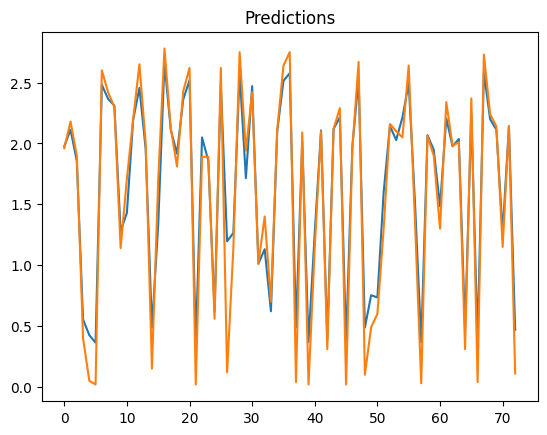

In [ ]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
gru_mse = plot_predictions1(model,x_test, y_test)

### LSTM

Epoch 1/50
8/8 [==============================] - 7s 723ms/step - loss: 3.4497 - root_mean_squared_error: 1.8573 - val_loss: 3.0033 - val_root_mean_squared_error: 1.7330
Epoch 2/50
8/8 [==============================] - 4s 600ms/step - loss: 3.3657 - root_mean_squared_error: 1.8346 - val_loss: 2.9293 - val_root_mean_squared_error: 1.7115
Epoch 3/50
8/8 [==============================] - 3s 483ms/step - loss: 3.2825 - root_mean_squared_error: 1.8118 - val_loss: 2.8561 - val_root_mean_squared_error: 1.6900
Epoch 4/50
8/8 [==============================] - 4s 613ms/step - loss: 3.2014 - root_mean_squared_error: 1.7893 - val_loss: 2.7853 - val_root_mean_squared_error: 1.6689
Epoch 5/50
8/8 [==============================] - 4s 613ms/step - loss: 3.1222 - root_mean_squared_error: 1.7670 - val_loss: 2.7150 - val_root_mean_squared_error: 1.6477
Epoch 6/50
8/8 [==============================] - 3s 481ms/step - loss: 3.0409 - root_mean_squared_error: 1.7438 - val_loss: 2.6452 - val_root_mean_sq

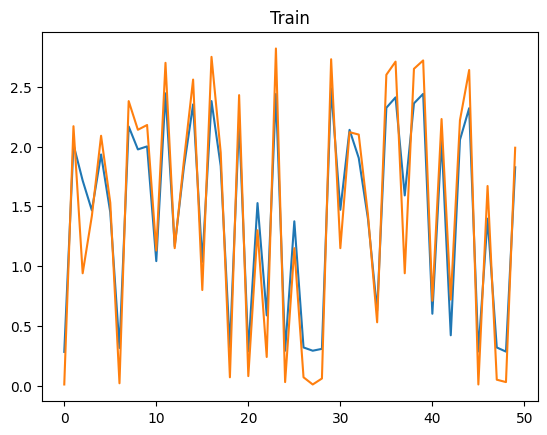

2/2 [==============================] - 0s 8ms/step


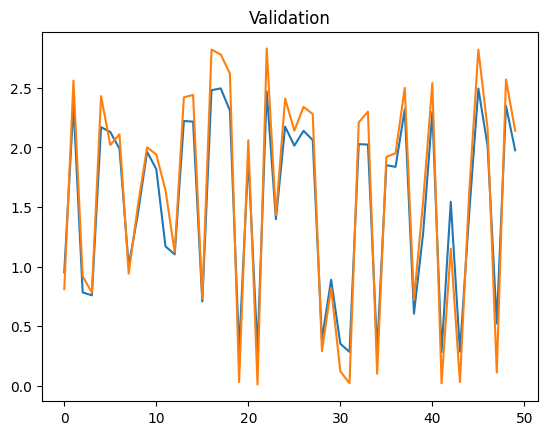

3/3 [==============================] - 0s 5ms/step


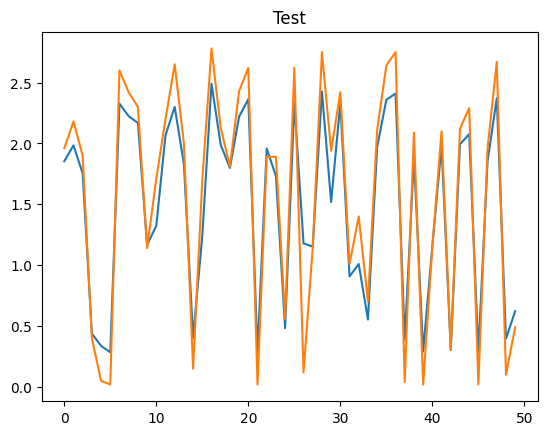

3/3 [==============================] - 0s 6ms/step


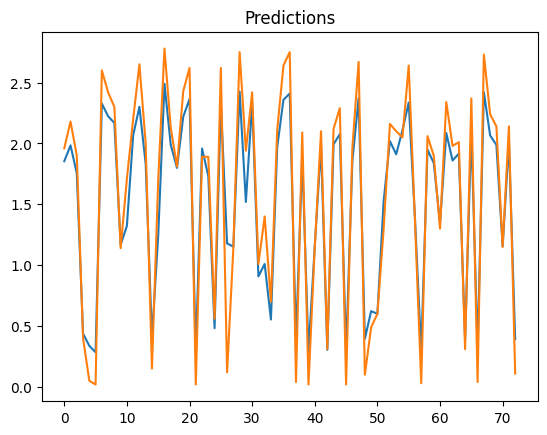

In [ ]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
lstm_mse = plot_predictions1(model,x_test, y_test)

### RNN

Epoch 1/50
8/8 [==============================] - 3s 231ms/step - loss: 1.3307 - root_mean_squared_error: 1.1535 - val_loss: 0.9432 - val_root_mean_squared_error: 0.9712
Epoch 2/50
8/8 [==============================] - 1s 202ms/step - loss: 0.9255 - root_mean_squared_error: 0.9620 - val_loss: 0.6283 - val_root_mean_squared_error: 0.7927
Epoch 3/50
8/8 [==============================] - 1s 195ms/step - loss: 0.6127 - root_mean_squared_error: 0.7827 - val_loss: 0.3967 - val_root_mean_squared_error: 0.6299
Epoch 4/50
8/8 [==============================] - 2s 299ms/step - loss: 0.3866 - root_mean_squared_error: 0.6218 - val_loss: 0.2370 - val_root_mean_squared_error: 0.4869
Epoch 5/50
8/8 [==============================] - 2s 291ms/step - loss: 0.2350 - root_mean_squared_error: 0.4847 - val_loss: 0.1384 - val_root_mean_squared_error: 0.3720
Epoch 6/50
8/8 [==============================] - 2s 277ms/step - loss: 0.1462 - root_mean_squared_error: 0.3824 - val_loss: 0.0833 - val_root_mean_sq

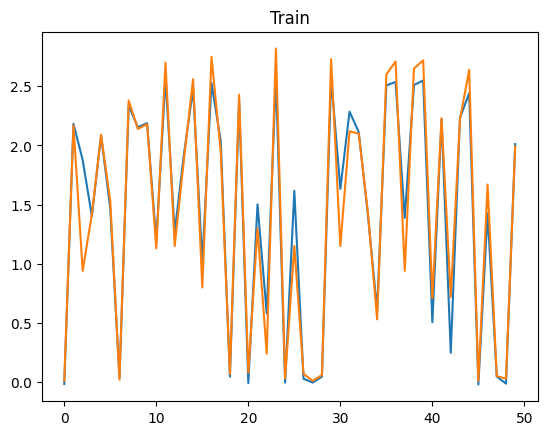

2/2 [==============================] - 0s 8ms/step


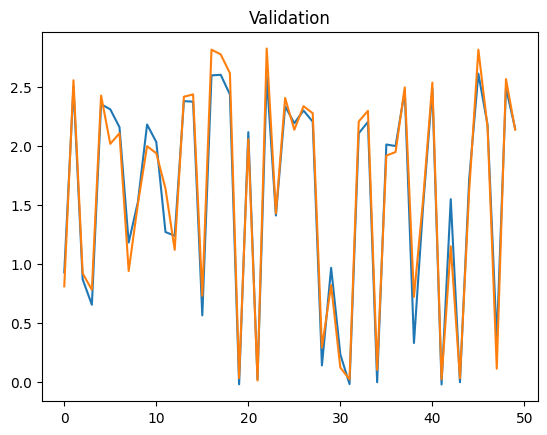

3/3 [==============================] - 0s 4ms/step


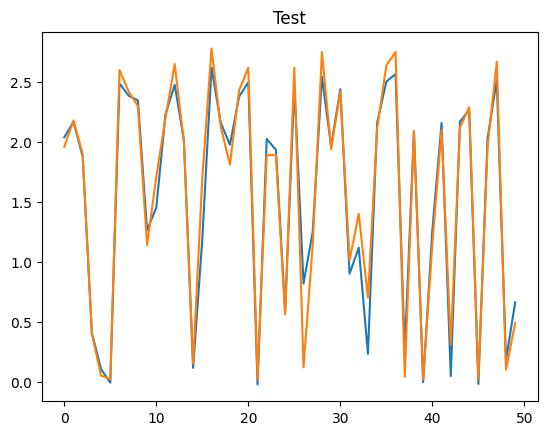

3/3 [==============================] - 0s 4ms/step


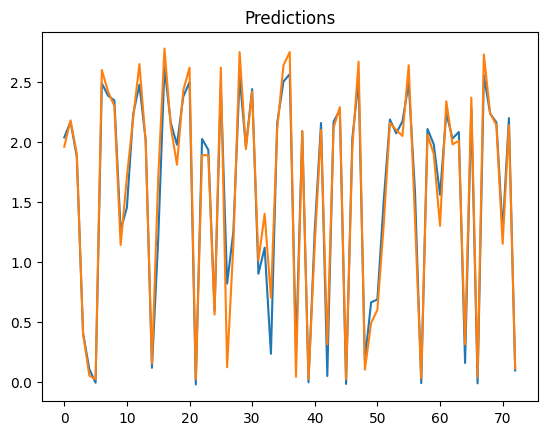

In [ ]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
rnn_mse = plot_predictions1(model,x_test, y_test)

# Moving Average

In [ ]:
window_size = 3

def moving_average(data, window_size):
    cumsum = np.cumsum(data, axis=0)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

moving_avg_data = np.apply_along_axis(lambda x: moving_average(x, window_size), axis=0, arr=x_train)
target = y_train[window_size - 1:].flatten()

#### CNN

Epoch 1/50
8/8 [==============================] - 1s 107ms/step - loss: 2.5948 - root_mean_squared_error: 1.6108 - val_loss: 1.9976 - val_root_mean_squared_error: 1.4134
Epoch 2/50
8/8 [==============================] - 1s 88ms/step - loss: 2.3979 - root_mean_squared_error: 1.5485 - val_loss: 1.8090 - val_root_mean_squared_error: 1.3450
Epoch 3/50
8/8 [==============================] - 1s 185ms/step - loss: 2.2165 - root_mean_squared_error: 1.4888 - val_loss: 1.6303 - val_root_mean_squared_error: 1.2769
Epoch 4/50
8/8 [==============================] - 1s 92ms/step - loss: 2.0440 - root_mean_squared_error: 1.4297 - val_loss: 1.4632 - val_root_mean_squared_error: 1.2096
Epoch 5/50
8/8 [==============================] - 1s 131ms/step - loss: 1.8830 - root_mean_squared_error: 1.3722 - val_loss: 1.3033 - val_root_mean_squared_error: 1.1416
Epoch 6/50
8/8 [==============================] - 1s 127ms/step - loss: 1.7312 - root_mean_squared_error: 1.3158 - val_loss: 1.1559 - val_root_mean_squa

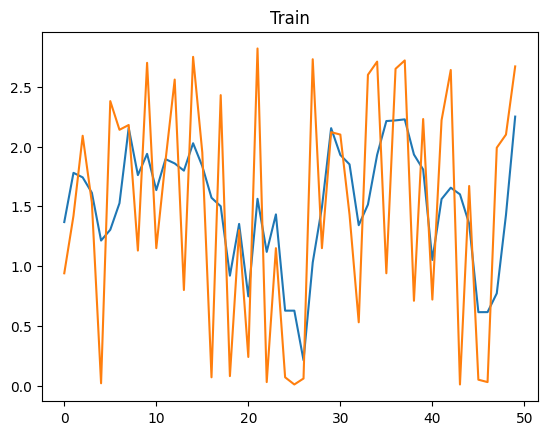

2/2 [==============================] - 0s 6ms/step


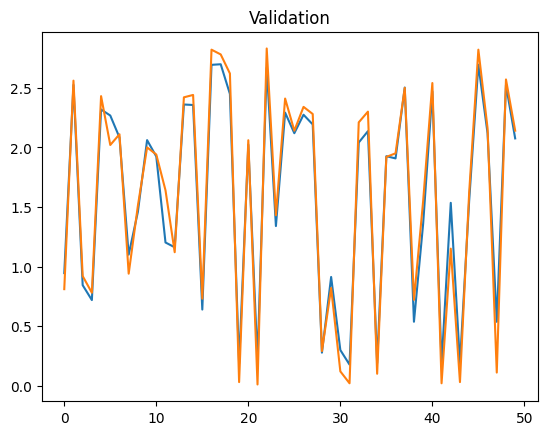

3/3 [==============================] - 0s 4ms/step


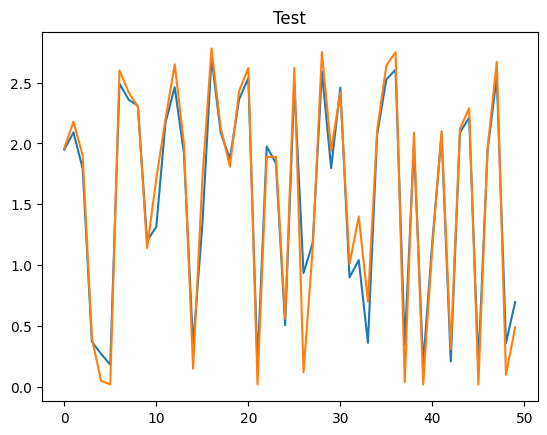

3/3 [==============================] - 0s 4ms/step


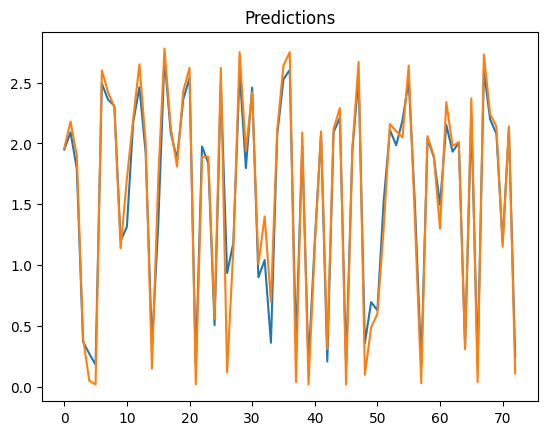

In [ ]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_cnn_mse = plot_predictions1(model,x_test, y_test)

#### GRU

Epoch 1/50
8/8 [==============================] - 6s 480ms/step - loss: 2.3794 - root_mean_squared_error: 1.5425 - val_loss: 1.8255 - val_root_mean_squared_error: 1.3511
Epoch 2/50
8/8 [==============================] - 3s 402ms/step - loss: 2.2375 - root_mean_squared_error: 1.4958 - val_loss: 1.6862 - val_root_mean_squared_error: 1.2986
Epoch 3/50
8/8 [==============================] - 3s 492ms/step - loss: 2.0971 - root_mean_squared_error: 1.4481 - val_loss: 1.5537 - val_root_mean_squared_error: 1.2465
Epoch 4/50
8/8 [==============================] - 4s 557ms/step - loss: 1.9697 - root_mean_squared_error: 1.4035 - val_loss: 1.4256 - val_root_mean_squared_error: 1.1940
Epoch 5/50
8/8 [==============================] - 3s 410ms/step - loss: 1.8445 - root_mean_squared_error: 1.3581 - val_loss: 1.3033 - val_root_mean_squared_error: 1.1416
Epoch 6/50
8/8 [==============================] - 3s 416ms/step - loss: 1.7244 - root_mean_squared_error: 1.3132 - val_loss: 1.1890 - val_root_mean_sq

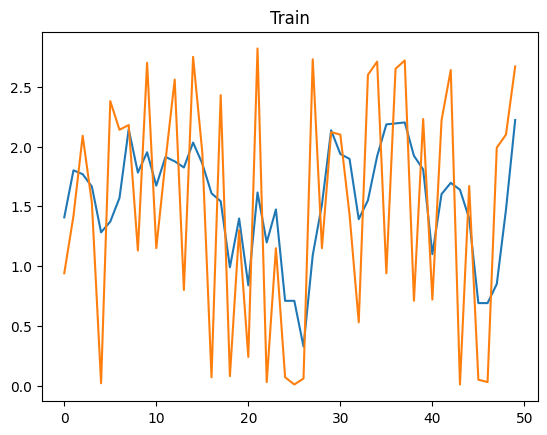

2/2 [==============================] - 0s 6ms/step


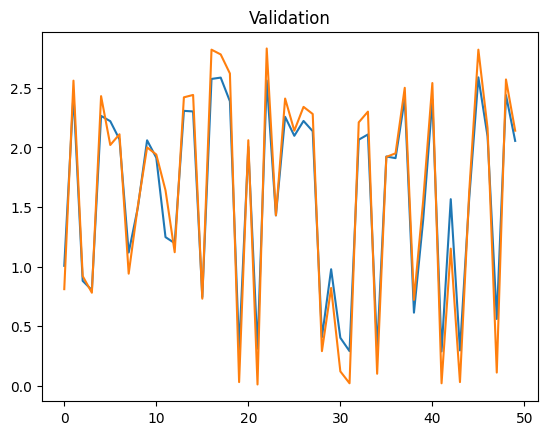

3/3 [==============================] - 0s 6ms/step


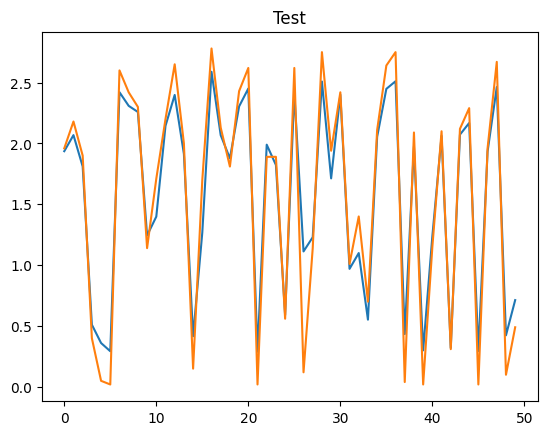

3/3 [==============================] - 0s 4ms/step


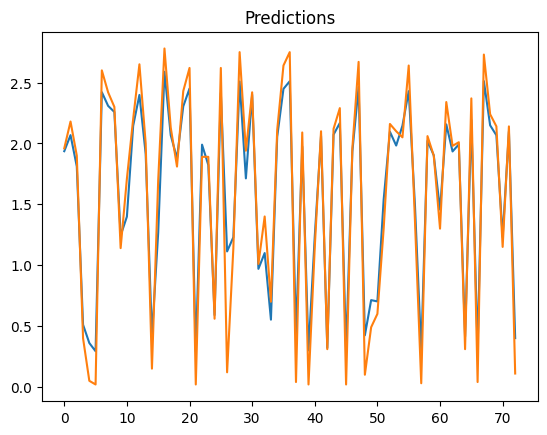

In [ ]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_gru/', save_best_only=True)
model = fit_model(model, cp, epochs,  moving_avg_data, target, x_val, y_val)

plot_train("mavg_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_gru_mse = plot_predictions1(model,x_test, y_test)

#### LSTM

In [ ]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_rnn_mse = plot_predictions1(model,x_test, y_test)

# AutoEncoder

### CNN

In [ ]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
auto_cnn_mse

### GRU

In [ ]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_gru/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
auto_gru_mse

### LSTM

In [ ]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
model.add(Dense(8, 'relu'))
model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
auto_lstm_mse

### RNN

In [ ]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
auto_rnn_mse

# Moving Average with Encoder

### CNN

In [ ]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, 10, moving_avg_data, target, x_val, y_val)

plot_train("mavg_autoencoder_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_auto_cnn_mse

### RNN

In [ ]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_rnn/', save_best_only=True)
model = fit_model(model, cp, 10,moving_avg_data,target, x_val, y_val)


plot_train("mavg_auto_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_auto_rnn_mse

### GRU

In [ ]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_gru/', save_best_only=True)

model = fit_model(model, cp, 10, moving_avg_data, target, x_val, y_val)

plot_train("mavg_auto_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_auto_gru_mse

### LSTM

In [ ]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
#model.add(Dense(8, 'relu'))
#model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_lstm/', save_best_only=True)
model = fit_model(model, cp, 10,moving_avg_data, target, x_val, y_val)


plot_train("mavg_auto_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_auto_lstm_mse

# Hybrid

## General

### CNN LSTM

In [ ]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_cnn_lstm_mse

### RNN LSTM

In [ ]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(3,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_rnn_lstm_mse

### RNN GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_rnn_gru_mse

### CNN GRU

In [ ]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_cnn_gru_mse

### CNN RNN GRU

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3, 1)))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_cnn_rnn_gru_mse

### LSTM RNN GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_lstm_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_lstm_rnn_gru_mse

## Moving Average

### CNN LSTM

In [ ]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_lstm_mse

### RNN LSTM

In [ ]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(3,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_rnn_lstm_mse

### RNN GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_rnn_gru_mse

### CNN GRU

In [ ]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
#model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_gru_mse

### CNN RNN GRU

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3, 1)))
#model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_rnn_gru_mse

### RNN LSTM GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_hybrid_lstm_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_lstm_rnn_gru_mse

# MSE

In [ ]:
mse_list = [cnn_mse, rnn_mse, gru_mse, lstm_mse,
            mvg_cnn_mse, mvg_rnn_mse, mvg_gru_mse, mvg_lstm_mse,
            auto_cnn_mse, auto_rnn_mse, auto_gru_mse, auto_lstm_mse,
            mavg_auto_cnn_mse, mavg_auto_rnn_mse, mavg_auto_gru_mse, mavg_auto_lstm_mse,
            hybrid_cnn_lstm_mse, hybrid_lstm_rnn_gru_mse,hybrid_cnn_rnn_gru_mse,hybrid_cnn_gru_mse,
            hybrid_rnn_gru_mse,hybrid_rnn_lstm_mse,
            mavg_hybrid_cnn_lstm_mse, mavg_hybrid_lstm_rnn_gru_mse,mavg_hybrid_cnn_rnn_gru_mse,
            mavg_hybrid_cnn_gru_mse,mavg_hybrid_rnn_gru_mse,mavg_hybrid_rnn_lstm_mse]

model_n = ["cnn", "rnn", "gru", "lstm",
           "mvg_cnn", "mvg_rnn", "mvg_gru", "mvg_lstm",
           "auto_cnn", "auto_rnn", "auto_gru", "auto_lstm",
           "mvg_auto_cnn", "mvg_auto_rnn", "mvg_auto_gru", "mvg_auto_lstm",
           "hybrid_cnn_lstm", "hybrid_lstm_rnn_gru" ,"hybrid_cnn_rnn_gru","hybrid_cnn_gru",
           "hybrid_rnn_gru","hybrid_rnn_lstm",
           "mavg_hybrid_cnn_lstm", "mavg_hybrid_lstm_rnn_gru","mavg_hybrid_cnn_rnn_gru",
           "mavg_hybrid_cnn_gru","mavg_hybrid_rnn_gru","mavg_hybrid_rnn_lstm"
          ]
msedf = pd.DataFrame({
    "Model": model_n,
    "MSE": mse_list
})

rmse = np.sqrt(msedf.MSE)
msedf["RMSE"] = rmse

In [ ]:
msedf

In [ ]:
msedf.to_csv("msedf.csv", index= False)

In [ ]:
msedf.plot("Model", "RMSE", kind= "bar")